In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(["science", "nature"])

import matplotx
import numpy as np
import pandas as pd

%matplotlib inline

In [53]:
all_res = glob("out/**/*.pkl")

In [54]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    gpr_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["gpr_baseline"]["mean_absolute_error"],
        "max_error": loaded["gpr_baseline"]["max_error"],
        "mse": loaded["gpr_baseline"]["mean_squared_error"],
    }

    compiled_gpr.append(gpr_metrics)

In [55]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [56]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std", "count"]
)

In [57]:
compiled_gpr_grouped = compiled_gpr.groupby(["num_train_points"]).agg(["mean", "std"])

In [58]:
compiled_grouped_res

mae                     max_error  \
                                       mean         std count        mean   
representation num_train_points                                             
SMILES         10                 59.133152    8.856563     3  175.000000   
               20                 66.924112   13.107848     6  160.166667   
               50                 39.724038    2.875243     5  205.400000   
               100                34.460548    5.097250     5  197.400000   
               200                28.205142    5.004111     5  274.200000   
inchi          10                116.514466   36.937609     5  355.400000   
               20                 53.482517   15.383598     5  175.200000   
               50                 38.568031    3.027741     6  168.166667   
               100                38.206147    4.541330     6  246.833333   
               200                26.752224    4.619014     6  156.333333   
name           10                       NaN         NaN     0         NaN   
               20                289.866222  154.890492     2  473.749400   
               50                 92.689536   62.744465     6  178.000000   
               100                42.812120   10.375687     7  157.142857   
               200                29.858000    5.645395     6  127.000000   
selfies        10                 63.373657    8.501341     4  252.500000   
               20                 61.274015   11.483249     8  230.625000   
               50                 38.806610    2.412283     7  212.571429   
               100                34.822587    3.501700     8  194.625000   
               200                30.934494    4.635337     9  210.555556   

                                                             mse  \
                                        std count           mean   
representation num_train_points                                    
SMILES         10                 33.181320     3    5631.299114   
               20                 14.048725     6    6748.007875   
               50                 70.450692     5    3196.109758   
               100                54.820617     5    2491.245908   
               200               214.984185     5    2578.999404   
inchi          10                 85.459347     5   20146.781291   
               20                 38.251797     5    4775.260739   
               50                 54.208548     6    2912.182910   
               100               106.540915     6    3702.476666   
               200                26.575678     6    1741.914461   
name           10                       NaN     0            NaN   
               20                 93.690800     2  100772.815798   
               50                 43.538489     6   14686.196935   
               100                35.130369     7    3917.823772   
               200                48.748333     6    2233.208288   
selfies        10                 44.094595     4    7065.053798   
               20                 74.972257     8    6238.590864   
               50                 76.746025     7    3231.068770   
               100                61.889158     8    2694.701494   
               200               104.721191     9    2553.225823   

                                                     
                                          std count  
representation num_train_points                      
SMILES         10                  936.646142     3  
               20                 2093.491301     6  
               50                  313.798425     5  
               100                 638.275268     5  
               200                1982.754811     5  
inchi          10                10346.275987     5  
               20                 2372.891302     5  
               50                  614.212635     6  
               100                1525.067507     6  
               200                 631.012699     6  
n

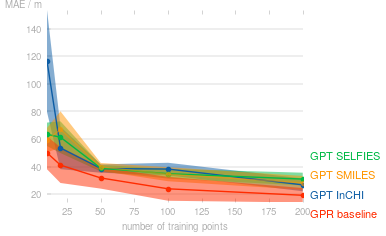

In [59]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1, 1)

    # ax.plot(
    #     compiled_grouped_res.loc["name", :].index,
    #     compiled_grouped_res.loc["name", :]['mae']['mean'],
    #     label='GPT Name',
    #     marker='o'
    # )

    # ax.fill_between(
    #     compiled_grouped_res.loc["name", :].index,
    #     compiled_grouped_res.loc["name", :]['mae']['mean'] - compiled_grouped_res.loc["name", :]['mae']['std'],
    #     compiled_grouped_res.loc["name", :]['mae']['mean'] + compiled_grouped_res.loc["name", :]['mae']['std'],
    #       alpha=.5
    # )

    ax.plot(
        compiled_grouped_res.loc["inchi", :].index,
        compiled_grouped_res.loc["inchi", :]["mae"]["mean"],
        label="GPT InCHI",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["inchi", :].index,
        compiled_grouped_res.loc["inchi", :]["mae"]["mean"]
        - compiled_grouped_res.loc["inchi", :]["mae"]["std"],
        compiled_grouped_res.loc["inchi", :]["mae"]["mean"]
        + compiled_grouped_res.loc["inchi", :]["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_grouped_res.loc["selfies", :].index,
        compiled_grouped_res.loc["selfies", :]["mae"]["mean"],
        label="GPT SELFIES",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["selfies", :].index,
        compiled_grouped_res.loc["selfies", :]["mae"]["mean"]
        - compiled_grouped_res.loc["selfies", :]["mae"]["std"],
        compiled_grouped_res.loc["selfies", :]["mae"]["mean"]
        + compiled_grouped_res.loc["selfies", :]["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_grouped_res.loc["SMILES", :].index,
        compiled_grouped_res.loc["SMILES", :]["mae"]["mean"],
        label="GPT SMILES",
        marker="o",
        alpha=0.5,
    )

    ax.fill_between(
        compiled_grouped_res.loc["SMILES", :].index,
        compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
        - compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
        compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
        + compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index,
        compiled_gpr_grouped["mae"]["mean"],
        label="GPR baseline",
        marker="o",
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[:].index,
        compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["std"],
        compiled_gpr_grouped.loc[:]["mae"]["mean"] + compiled_gpr_grouped.loc[:]["mae"]["std"],
        alpha=0.5,
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel("number of training points", labelpad=4)
    matplotx.ylabel_top("MAE / m")
    # ax.set_xscale('log')
    # ax.set_yscale('symlog')
fig.savefig("phoswitch_regression_res.pdf", bbox_inches="tight")